In [1]:
import requests
import pandas as pd


url = "https://archive-api.open-meteo.com/v1/archive?latitude=51.0501&longitude=-114.0853&start_date=2022-07-01&end_date=2025-07-31&hourly=snowfall,cloud_cover,precipitation,wind_gusts_10m,snow_depth,rain,weather_code,relative_humidity_2m,is_day,wind_speed_10m,temperature_2m,dew_point_2m,cloud_cover_low&timezone=auto"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    weather_df = pd.DataFrame(data['hourly'])
    display(weather_df.head())
else:
    print("API request failed with status code:", response.status_code)

,time,snowfall,cloud_cover,precipitation,wind_gusts_10m,snow_depth,rain,weather_code,relative_humidity_2m,is_day,wind_speed_10m,temperature_2m,dew_point_2m,cloud_cover_low
0,2022-07-01T00:00,0.0,4,0.0,10.1,0.0,0.0,0,68,0,5.8,14.8,9.1,0
1,2022-07-01T01:00,0.0,0,0.0,7.6,0.0,0.0,0,70,0,4.3,14.0,8.6,0
2,2022-07-01T02:00,0.0,0,0.0,5.8,0.0,0.0,0,70,0,1.8,13.7,8.4,0
3,2022-07-01T03:00,0.0,0,0.0,7.2,0.0,0.0,0,86,0,6.2,10.1,7.9,0
4,2022-07-01T04:00,0.0,0,0.0,9.0,0.0,0.0,0,92,0,4.7,8.9,7.7,0


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27048 entries, 0 to 27047
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  27048 non-null  datetime64[ns]
 1   snowfall              27048 non-null  float64       
 2   cloud_cover           27048 non-null  int64         
 3   precipitation         27048 non-null  float64       
 4   wind_gusts_10m        27048 non-null  float64       
 5   snow_depth            27048 non-null  float64       
 6   rain                  27048 non-null  float64       
 7   weather_code          27048 non-null  int64         
 8   relative_humidity_2m  27048 non-null  int64         
 9   is_day                27048 non-null  int64         
 10  wind_speed_10m        27048 non-null  float64       
 11  temperature_2m        27048 non-null  float64       
 12  dew_point_2m          27048 non-null  float64       
 13  cloud_cover_low 

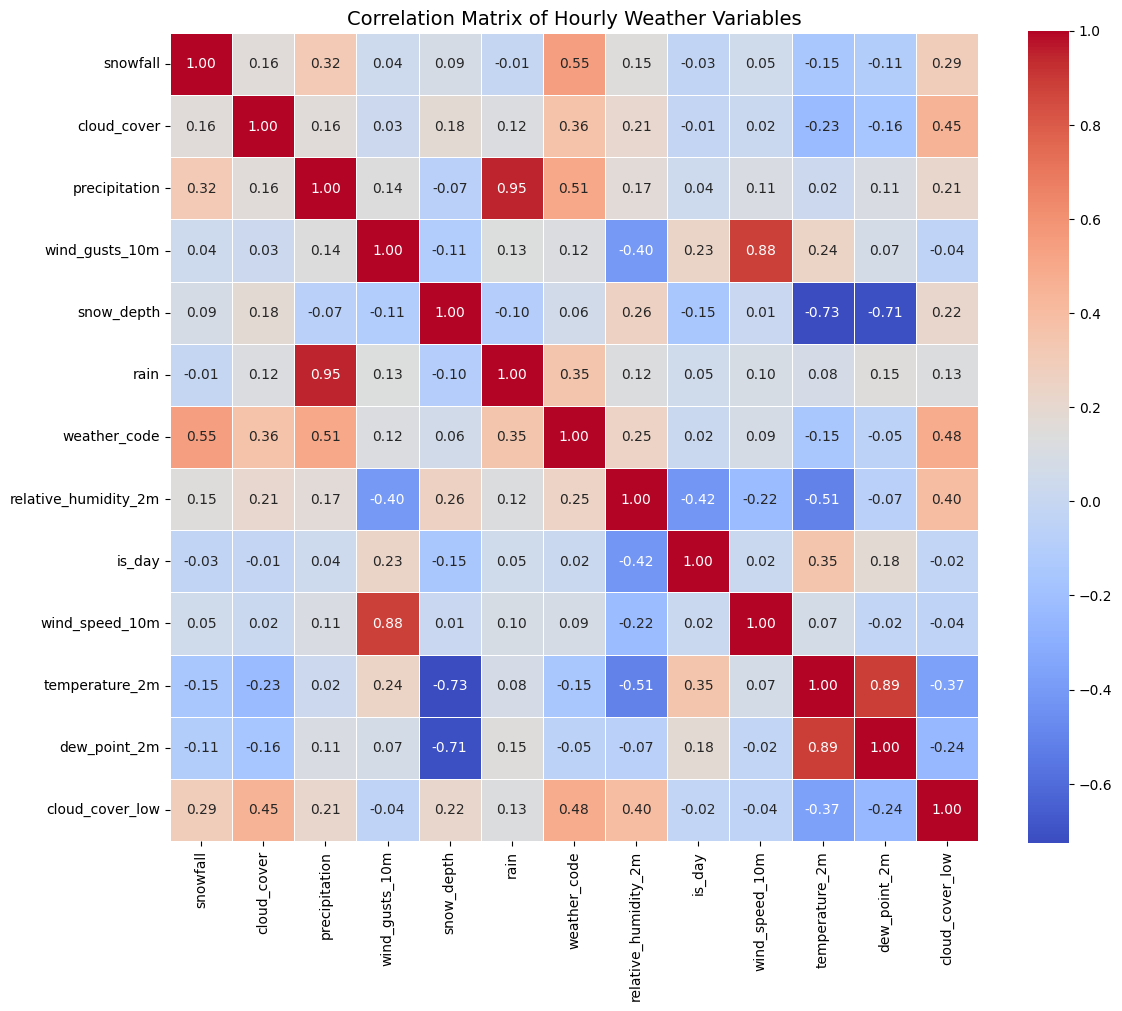

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = weather_df.drop(columns=['time'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Hourly Weather Variables", fontsize=14)
plt.tight_layout()
plt.show()


In [42]:
print("\nCorrelation matrix:")
display(weather_df.drop(columns=["time"]).corr())


Correlation matrix:


,snowfall,cloud_cover,precipitation,wind_gusts_10m,snow_depth,rain,weather_code,relative_humidity_2m,is_day,wind_speed_10m,temperature_2m,dew_point_2m
snowfall,1.000000,0.161561,0.316770,0.041937,0.088537,-0.007177,0.545768,0.149418,-0.028112,0.052542,-0.149805,-0.105884
cloud_cover,0.161561,1.000000,0.162669,0.028141,0.182426,0.116587,0.361933,0.209497,-0.013223,0.016882,-0.231969,-0.164898
precipitation,0.316770,0.162669,1.000000,0.138860,-0.065933,0.946153,0.505353,0.165096,0.038898,0.107842,0.023914,0.106375
wind_gusts_10m,0.041937,0.028141,0.138860,1.000000,-0.106787,0.132081,0.118670,-0.403782,0.234829,0.883320,0.241506,0.074658
snow_depth,0.088537,0.182426,-0.065933,-0.106787,1.000000,-0.099418,0.060151,0.259446,-0.152546,0.009642,-0.726747,-0.708364
rain,-0.007177,0.116587,0.946153,0.132081,-0.099418,1.000000,0.347220,0.123171,0.050557,0.095766,0.076011,0.147960
weather_code,0.545768,0.361933,0.505353,0.118670,0.060151,0.347220,1.000000,0.245854,0.017264,0.087899,-0.147972,-0.053856
relative_humidity_2m,0.149418,0.209497,0.165096,-0.403782,0.259446,0.123171,0.245854,1.000000,-0.422193,-0.224162,-0.506676,-0.067925
is_day,-0.028112,-0.013223,0.038898,0.234829,-0.152546,0.050557,0.017264,-0.422193,1.000000,0.021445,0.346417,0.180356
wind_speed_10m,0.052542,0.016882,0.107842,0.883320,0.009642,0.095766,0.087899,-0.224162,0.021445,1.000000,0.073320,-0.023872


In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27048 entries, 0 to 27047
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  27048 non-null  datetime64[ns]
 1   snowfall              27048 non-null  float64       
 2   cloud_cover           27048 non-null  int64         
 3   precipitation         27048 non-null  float64       
 4   wind_gusts_10m        27048 non-null  float64       
 5   snow_depth            27048 non-null  float64       
 6   rain                  27048 non-null  float64       
 7   weather_code          27048 non-null  int64         
 8   relative_humidity_2m  27048 non-null  int64         
 9   is_day                27048 non-null  int64         
 10  wind_speed_10m        27048 non-null  float64       
 11  temperature_2m        27048 non-null  float64       
 12  dew_point_2m          27048 non-null  float64       
 13  cloud_cover_low 

In [10]:
drop_cols = [
    "precipitation",     # sum of rain + snowfall
    "dew_point_2m",      # ~0.89 correlation with temperature_2m
    "weather_code" ,   # derived from rain, snowfall, cloud cover
    "cloud_cover"
    #"wind_gusts_10m"     # skip unless specifically modeling gust impacts
    ]
weather_clean = weather_df.drop(columns=drop_cols)

In [11]:
weather_clean.isnull().sum()

time                    0
snowfall                0
wind_gusts_10m          0
snow_depth              0
rain                    0
relative_humidity_2m    0
is_day                  0
wind_speed_10m          0
temperature_2m          0
cloud_cover_low         0
dtype: int64

In [12]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27048 entries, 0 to 27047
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  27048 non-null  datetime64[ns]
 1   snowfall              27048 non-null  float64       
 2   wind_gusts_10m        27048 non-null  float64       
 3   snow_depth            27048 non-null  float64       
 4   rain                  27048 non-null  float64       
 5   relative_humidity_2m  27048 non-null  int64         
 6   is_day                27048 non-null  int64         
 7   wind_speed_10m        27048 non-null  float64       
 8   temperature_2m        27048 non-null  float64       
 9   cloud_cover_low       27048 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 2.1 MB


In [13]:
numeric_cols = weather_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['is_day']] 
numeric_cols

['snowfall',
 'wind_gusts_10m',
 'snow_depth',
 'rain',
 'relative_humidity_2m',
 'wind_speed_10m',
 'temperature_2m',
 'cloud_cover_low']

In [14]:
print("snowfall",weather_clean['rain'].unique())
print("rain",weather_clean['rain'].unique())

snowfall [0.  1.3 0.1 0.2 2.9 0.3 0.4 1.  0.9 2.3 0.5 0.7 1.5 5.4 2.  1.9 0.6 0.8
 1.2 2.5 1.1 5.8 3.8 1.6 2.4 4.4 4.1 3.2 1.4 3.4 2.2 3.1 4.  5.6 3.6 1.7
 2.1 1.8 2.7 5.2 2.6 3.  2.8 3.3 4.5 3.7 6.  4.9 4.3 5.  3.9 3.5 6.6 4.2
 4.7 5.1 4.8 5.7]
rain [0.  1.3 0.1 0.2 2.9 0.3 0.4 1.  0.9 2.3 0.5 0.7 1.5 5.4 2.  1.9 0.6 0.8
 1.2 2.5 1.1 5.8 3.8 1.6 2.4 4.4 4.1 3.2 1.4 3.4 2.2 3.1 4.  5.6 3.6 1.7
 2.1 1.8 2.7 5.2 2.6 3.  2.8 3.3 4.5 3.7 6.  4.9 4.3 5.  3.9 3.5 6.6 4.2
 4.7 5.1 4.8 5.7]


In [15]:
weather_clean.describe()

,time,snowfall,wind_gusts_10m,snow_depth,rain,relative_humidity_2m,is_day,wind_speed_10m,temperature_2m,cloud_cover_low
count,27048,27048.000000,27048.000000,27048.000000,27048.000000,27048.000000,27048.000000,27048.000000,27048.000000,27048.000000
mean,2024-01-15 11:30:00,0.011768,21.576764,0.091478,0.040376,65.605479,0.513199,10.330801,5.440070,19.875370
min,2022-07-01 00:00:00,0.000000,1.100000,0.000000,0.000000,8.000000,0.000000,0.000000,-39.100000,0.000000
25%,2023-04-08 17:45:00,0.000000,14.000000,0.000000,0.000000,50.000000,0.000000,6.600000,-2.200000,0.000000
50%,2024-01-15 11:30:00,0.000000,19.800000,0.000000,0.000000,69.000000,1.000000,9.500000,6.000000,0.000000
75%,2024-10-23 05:15:00,0.000000,27.000000,0.200000,0.000000,82.000000,1.000000,13.100000,14.500000,15.000000
max,2025-07-31 23:00:00,2.030000,89.300000,0.480000,6.600000,100.000000,1.000000,38.200000,33.800000,100.000000
std,NaN,0.065665,10.265064,0.130464,0.274527,20.320924,0.499835,5.238205,12.204726,36.161695


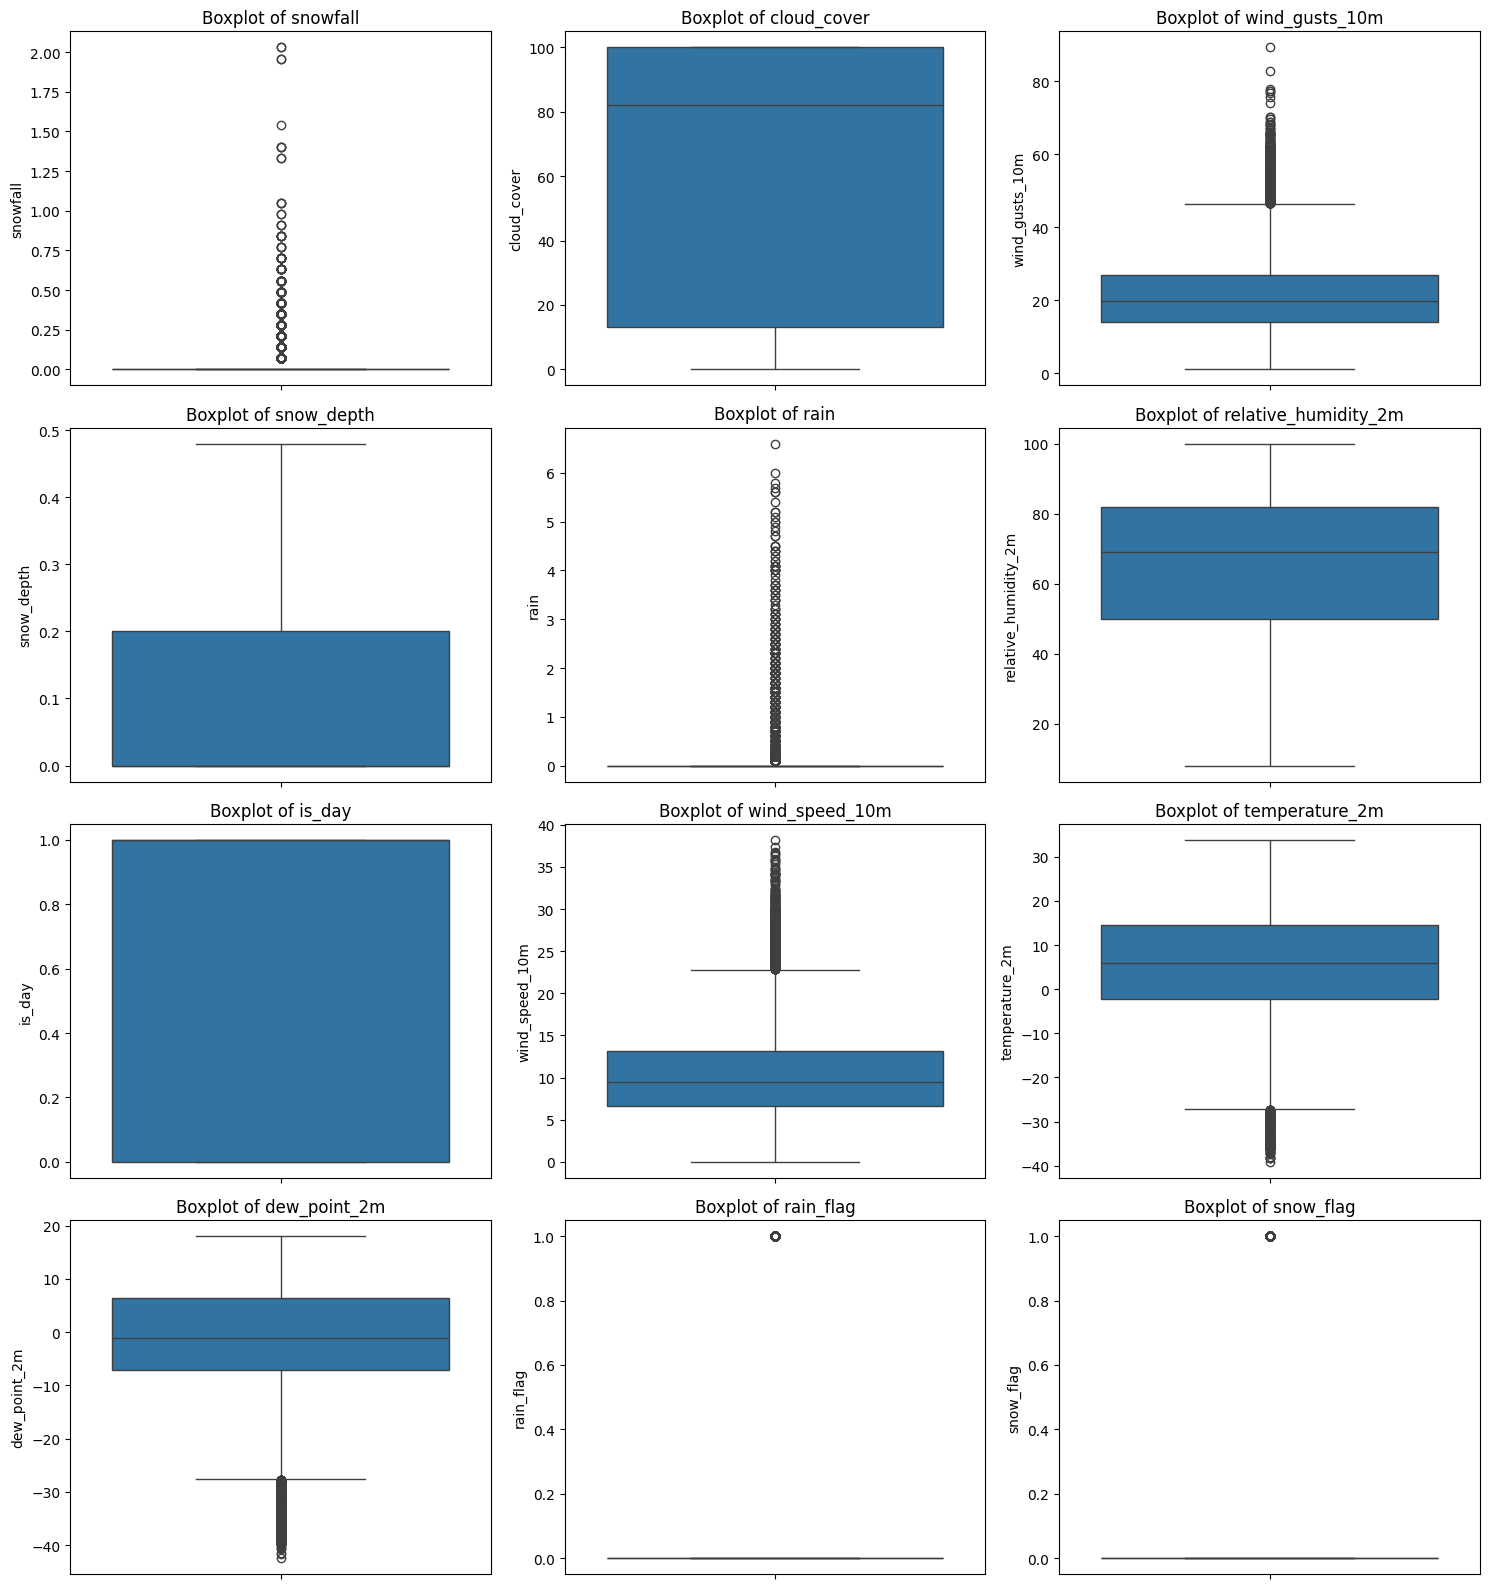

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid of boxplots
num_cols = weather_clean.select_dtypes(include='number').columns
num_plots = len(num_cols)
cols = 3  # Number of plots per row
rows = -(-num_plots // cols)  # Ceiling division

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=weather_clean, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [ ]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = weather_clean[col].quantile(0.25)
    Q3 = weather_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = weather_clean[(weather_clean[col] < lower_bound) | (weather_clean[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': outliers.count(),
        'indices': outliers.index.tolist(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df[['count', 'lower_bound', 'upper_bound']])

                     count lower_bound upper_bound
snowfall              1772         0.0         0.0
cloud_cover              0      -117.5       230.5
wind_gusts_10m         683        -5.5        46.5
snow_depth               0        -0.3         0.5
rain                  1814         0.0         0.0
relative_humidity_2m     0         2.0       130.0
wind_speed_10m         692       -3.15       22.85
temperature_2m         231      -27.25       39.55
dew_point_2m           437       -27.6        26.8


In [22]:
weather_clean.to_csv('weather_data_cleaned_fog.csv', index=False)